# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

## Importing and Exploring the dataset

In [2]:
data = pd.read_csv('amazon_tweets.csv')

In [3]:
data.head(10)

,Unnamed: 0,amazon_tweets
0,0,𝗞𝗞𝗥 𝗙𝗶𝗹𝗺𝘀 𝗘𝗽. 𝟰: Coach McCullum says he’s the ...
1,1,"Initially unsold in '14, 𝙈𝙑𝙋 the next year. 💪🏼..."
2,2,#Mi11XPro: A Cut Above The Best!💪\n\n📱#Snapdra...
3,3,"Hey @amazonIN , I ordered a book from amazon, ..."
4,4,My amazon account has been blocked my @amazonI...
5,5,DK HOME APPLIANCES Professional Series Finger ...
6,6,Can we involve e-com like @Flipkart @amazonIN ...
7,7,Team Amazon Besharmi ki had Kardi Apne 29 Apri...
8,8,Dear @amazonIN \n\nI'm not able to login to my...
9,9,Theme of the month for @PrimeVideoIN subscribe...


### Cleaning the text

In [4]:
def clean_text(text):
    clean_words = re.sub("https\S+","",text)
    clean_words = re.sub("#[\w]*","",clean_words)
    clean_words = re.sub("@[\w]*","",clean_words)
    clean_words = re.sub("[^a-zA-Z0-9]"," ",clean_words)
    return clean_words

In [14]:
clean_text(data['amazon_tweets'][2905])

'       Where is Northeast part of India          Please t  '

In [11]:
clean_data = data.iloc[:,1].apply(clean_text)

In [13]:
clean_data.tail(20)

2894                    How to set up the  Fire TV Cube  
2895    Hey  I returned a product for a refund over a ...
2896    It is a latest device of IQOO7 5G SERIES with ...
2897     I have just participated in this amazing cont...
2898    KHUSHI 12 Pieces Hair Brush Comb Set Paddle Ha...
2899    Please help me with my order as it is delibera...
2900        S J D       Thanks Amazon for Contest        
2901    Amazon Fire Cube Launched in India   Specifica...
2902    Look at this image  Apparently 3yo kids have a...
2903    I played this interesting Quiz on Amazon Play ...
2904    Best Sellers in Office Products on   BUY     B...
2905           Where is Northeast part of India       ...
2906                            Thanks for this quiz     
2907                            Thanks for this quiz     
2908    Ofcourse another beast from iqoo the iqoo 7 co...
2909                I got all the answers correct        
2910    Ofcourse it would be the beast Snapdragon 888 ...
2911        I 

In [15]:
clean_data = pd.DataFrame(clean_data)

## Subjectivity and Polarity

In [16]:
# Get the subjectivity and polarity
def get_sub(text):
    return TextBlob(text).sentiment.subjectivity

def get_pol(text):
    return TextBlob(text).sentiment.polarity

In [20]:
get_pol(clean_data.iloc[990,0])

0.8

In [21]:
# Adding Subjectivity and Polarity to the data

clean_data['Subjectivity'] = clean_data.iloc[:,0].apply(get_sub)
clean_data['Polarity'] = clean_data.iloc[:,0].apply(get_pol)

In [22]:
clean_data.head(20)

,amazon_tweets,Subjectivity,Polarity
0,Coach McCullum says he s the ...,0.000000,0.000000
1,Initially unsold in 14 the next year ...,0.333333,0.166667
2,A Cut Above The Best A bright ...,0.400000,0.566667
3,Hey I ordered a book from amazon returned ...,0.000000,0.000000
4,My amazon account has been blocked my without...,0.000000,0.000000
5,DK HOME APPLIANCES Professional Series Finger ...,0.100000,0.100000
6,Can we involve e com like etc to list veri...,0.000000,0.000000
7,Team Amazon Besharmi ki had Kardi Apne 29 Apri...,0.000000,0.000000
8,Dear I m not able to login to my account A...,0.625000,-0.250000
9,Theme of the month for subscribers is here D...,0.000000,0.000000


In [23]:
clean_data[clean_data['Polarity']>0.5]  #positive comments

,amazon_tweets,Subjectivity,Polarity
2,A Cut Above The Best A bright ...,0.400000,0.566667
21,Giving keeps you very light there is no bagga...,0.905000,0.660000
27,Proud to be a part of Working here from 1 yea...,0.650000,0.625000
28,LOL Conflicting messages from,0.700000,0.800000
36,Win 5 000 3 000 2 000 and more ...,0.433333,0.700000
...,...,...,...
2872,This is great,0.750000,0.800000
2873,The best and brand new feature it s DUAL CHIP ...,0.377273,0.568182
2896,It is a latest device of IQOO7 5G SERIES with ...,0.766667,0.566667
2897,I have just participated in this amazing cont...,0.900000,0.600000


In [24]:
clean_data[clean_data['Polarity']<-0.5]   #negative comments

,amazon_tweets,Subjectivity,Polarity
69,Brutal by Uday Satpathy,1.000000,-0.875000
73,Don t order in Amazon fake delivery service fa...,1.000000,-0.666667
84,Very sorry to say that today I have lost my tr...,1.000000,-0.650000
116,This is horrible,1.000000,-1.000000
125,Every couple of years I make the mistake of us...,1.000000,-1.000000
187,I had ordered few items from Amazon And it is...,0.550000,-0.600000
197,It s Pathetic service of phone banking I h...,1.000000,-1.000000
217,What is this pathetic nuisance distasteful cra...,0.800000,-0.560000
267,very disappointed from your pathetic custome...,0.769444,-0.575000
302,hey My package is arriving today by 9 pm ...,1.000000,-1.000000


In [25]:
clean_data[clean_data['Subjectivity']>0.5]

,amazon_tweets,Subjectivity,Polarity
8,Dear I m not able to login to my account A...,0.625000,-0.250000
10,Very bad experience get from I think will ...,0.583333,0.045000
14,GOT SERIOUS power,0.666667,-0.333333
16,My Favourite Feature is Super Amoled Display ...,0.666667,0.333333
18,Some thing is happening though too little to...,0.520000,0.202500
...,...,...,...
2891,Such a pathetic service on Refunds You ve lit...,0.600000,-0.333333
2896,It is a latest device of IQOO7 5G SERIES with ...,0.766667,0.566667
2897,I have just participated in this amazing cont...,0.900000,0.600000
2899,Please help me with my order as it is delibera...,0.750000,-0.500000


## Sentiment function

In [26]:
def sentiment(polarity):
    if polarity>0.3:
        return 'Positive'
    elif polarity<-0.3:
        return 'Negative'
    else:
        return 'Neutral'

In [27]:
clean_data['Sentiment'] = clean_data['Polarity'].apply(sentiment)

In [28]:
clean_data.head(20)

,amazon_tweets,Subjectivity,Polarity,Sentiment
0,Coach McCullum says he s the ...,0.000000,0.000000,Neutral
1,Initially unsold in 14 the next year ...,0.333333,0.166667,Neutral
2,A Cut Above The Best A bright ...,0.400000,0.566667,Positive
3,Hey I ordered a book from amazon returned ...,0.000000,0.000000,Neutral
4,My amazon account has been blocked my without...,0.000000,0.000000,Neutral
5,DK HOME APPLIANCES Professional Series Finger ...,0.100000,0.100000,Neutral
6,Can we involve e com like etc to list veri...,0.000000,0.000000,Neutral
7,Team Amazon Besharmi ki had Kardi Apne 29 Apri...,0.000000,0.000000,Neutral
8,Dear I m not able to login to my account A...,0.625000,-0.250000,Neutral
9,Theme of the month for subscribers is here D...,0.000000,0.000000,Neutral


In [30]:
clean_data[clean_data['Sentiment']=='Negative']['amazon_tweets']

14                                    GOT SERIOUS power  
19      Are you guys serious   Sent not for sale item ...
69                       Brutal by Uday Satpathy         
73      Don t order in Amazon fake delivery service fa...
74      How Amazon is messing with consumer rights hid...
                              ...                        
2857    Shame on you  and  extorting money during this...
2860     Amazon ne mere sath cheat kiya he mere 2 mont...
2875    Twisted Tales From The Universe  Star Lady Tal...
2891    Such a pathetic service on Refunds  You ve lit...
2899    Please help me with my order as it is delibera...
Name: amazon_tweets, Length: 92, dtype: object

In [31]:
clean_data['Sentiment'].value_counts()

Neutral     1659
Positive    1163
Negative      92
Name: Sentiment, dtype: int64

### WordCloud for Neagtive Sentiment

In [33]:
text_list = list(clean_data[clean_data['Sentiment']=='Negative']['amazon_tweets'])
text = ' '.join(text_list)

Here, we have created a string of text of a list which includes the negative sentiment tweets

In [34]:
text

'     GOT SERIOUS power   Are you guys serious   Sent not for sale item and it is already used by someone else    Send tester product and don   Brutal by Uday Satpathy          Don t order in Amazon fake delivery service fake customer service worst service   AmazonIn How Amazon is messing with consumer rights hiding behind its policies   Once you added money in amazon pay wallet    Very sorry to say that today I have lost my trust on Amazon as I have ordered one mobile and the way ur delivery pe   Dear   You ve sent me the wrong product and your call center is unable to get through   How can I get a re   Ordered for steam inhaler  received face shield  Unable to exchange return through the App  Please help   This is horrible   Every couple of years I make the mistake of using    have a pathetic experience  decide never to use it ag   I am unable to exchange my realme c12 on Amazon pls help me    Again poor service by  I had ordered few items from Amazon  And it is highly disgusting to 

In [44]:
# let us remove the stopwords and make a new text 

In [38]:
lis = ['s','t','rt','hi','hello','amazon','thanks','please']
text_n=''
for i in text.split():
    if i.lower() not in lis:
        text_n = text_n+' '+i.lower()

In [39]:
text_n

' got serious power are you guys serious sent not for sale item and it is already used by someone else send tester product and don brutal by uday satpathy don order in fake delivery service fake customer service worst service amazonin how is messing with consumer rights hiding behind its policies once you added money in pay wallet very sorry to say that today i have lost my trust on as i have ordered one mobile and the way ur delivery pe dear you ve sent me the wrong product and your call center is unable to get through how can i get a re ordered for steam inhaler received face shield unable to exchange return through the app help this is horrible every couple of years i make the mistake of using have a pathetic experience decide never to use it ag i am unable to exchange my realme c12 on pls help me again poor service by i had ordered few items from and it is highly disgusting to see the delivery agents handling the products i worst service from taking more than 1 and half months for 

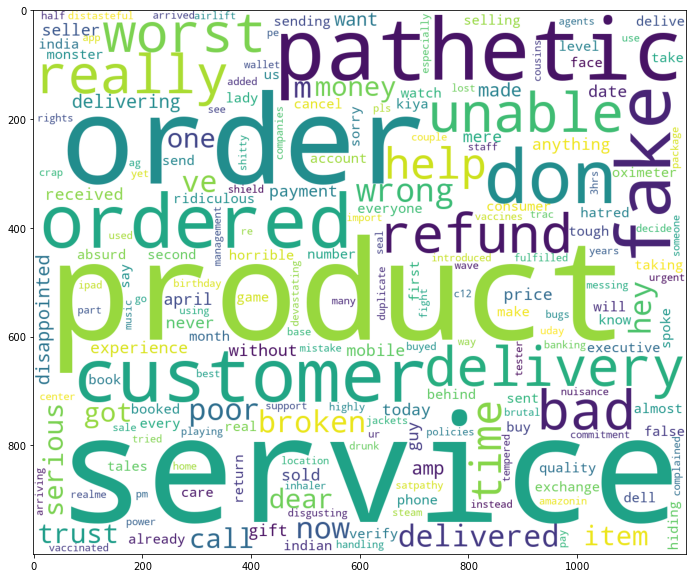

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
wc = WordCloud(width=1200,height=1000,background_color='white').generate(text_n)
plt.imshow(wc)
plt.show()

### WordCloud for Positive Sentiment

In [41]:
text_list = list(clean_data[clean_data['Sentiment']=='Positive']['amazon_tweets'])
text = ' '.join(text_list)

Here, we have created a string of text of a list which includes the positive sentiment tweets

In [42]:
lis = ['s','t','rt','hi','hello','amazon','thanks','please']
text_n=''
for i in text.split():
    if i.lower() not in lis:
        text_n = text_n+' '+i.lower()

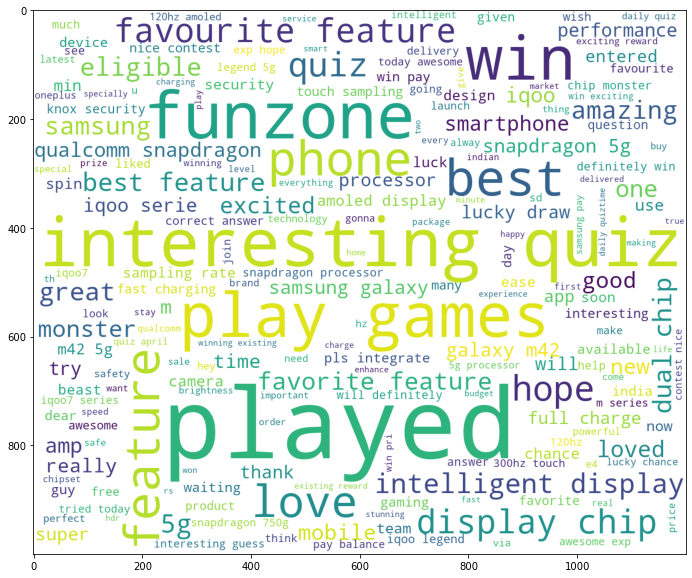

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
wc = WordCloud(width=1200,height=1000,background_color='white').generate(text_n)
plt.imshow(wc)
plt.show()